<div class="alert alert-block alert-info"><font size="6"><b>Sprint 3 Task 2 (S03_T02)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Do the practice on notebook GitHub "03 EXAMINING DATA" with SEABORN and "tips" dataset.</SPAN>

To solve this practice we start by **importing** all the required libraries:

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we load **tips.csv** dataset with Pandas ***pd.read_csv()*** function and perform a **preliminary** sudy of the data, shape, variables, etc.

In [81]:
tips_df = pd.read_csv('tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [82]:
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [83]:
df2 = tips_df[tips_df['size'].isin([2, 4])]
df2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [84]:
tips_df.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [85]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Analyzing this information we see that we have a dataframe with 244 rows, 7 columns thereby 2 dimensions and a (244, 7) shape. Also, there are no NaN's or missing values. The 7 columns are divided into 4 categorical variables and 3 numerical variables.

To continue the practice, we are going to create a new column in the dataframe with the percentage of ***tip*** over ***total_bill*** numerical variable and then perform another preliminary sudy. 

In [86]:
tips_df['tip_p'] = tips_df['tip'] * 100 / tips_df['total_bill']
tips_df['tip_p']

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Name: tip_p, Length: 244, dtype: float64

In [87]:
tips_df.describe(include='all').round(2) # with the - include='all' - parameter, all columns of the input will be included 
#in the output (categorical variables)

,total_bill,tip,sex,smoker,day,time,size,tip_p
count,244.00,244.00,244,244,244,244,244.00,244.00
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.79,3.00,NaN,NaN,NaN,NaN,2.57,16.08
std,8.90,1.38,NaN,NaN,NaN,NaN,0.95,6.11
min,3.07,1.00,NaN,NaN,NaN,NaN,1.00,3.56
25%,13.35,2.00,NaN,NaN,NaN,NaN,2.00,12.91
50%,17.80,2.90,NaN,NaN,NaN,NaN,2.00,15.48
75%,24.13,3.56,NaN,NaN,NaN,NaN,3.00,19.15


In [88]:
tips_df['tip_p'].isnull().sum()

0

In [89]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   tip_p       244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.4+ KB


In [90]:
tips_df.groupby('day')['tip_p'].std()

day
Fri     4.766531
Sat     5.129259
Sun     8.473889
Thur    3.865182
Name: tip_p, dtype: float64

In [91]:
tips_df.groupby('day')['tip_p'].mean().mean()

16.28094163597597

#### Matrix Plot

We can use this plot to identify pairwise relationships between numerical variables in a dataset. In this case we also apply a the categorical variable ***sex*** (hue).

In [92]:
sns.set_style('darkgrid') # Seaborn style

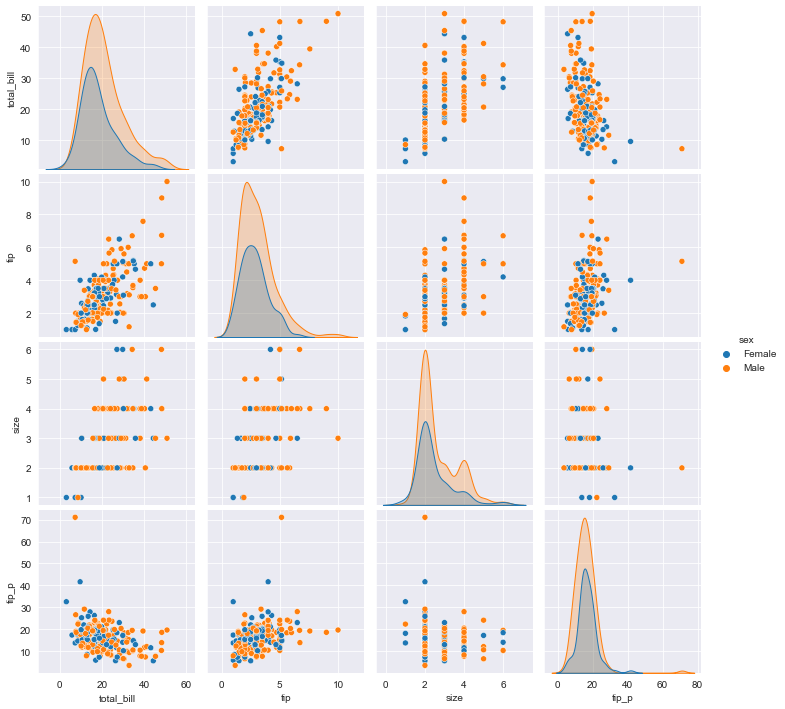

In [93]:
sns.pairplot(tips_df, hue = 'sex', diag_kind = 'kde')
plt.show()

We could say about this graph that for example ***total_bill*** and ***tip*** variables seem to have a linear relationship. Also men tend to pay more, probably because they eat more, invite or are the designated payers, so they pay more tip.

#### Bar plots

A bar plot represents an estimate of **central tendency for a numeric variable** with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. A barplot shows the relationship between a numeric and a categoric variable.

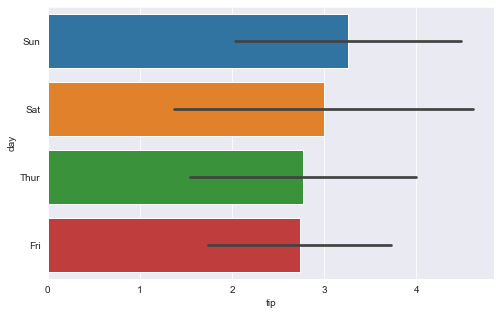

In [94]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(x='tip', y='day', data=tips_df, orient="h", ci="sd") # confidence intervals = standard deviation, if none ci = 95%
plt.show()

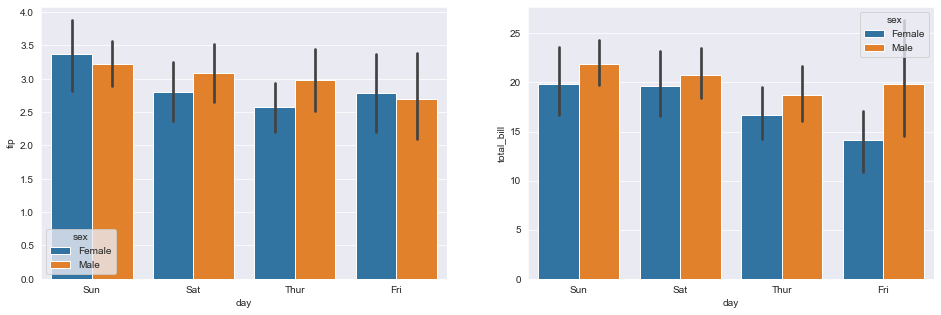

In [95]:
fig, (ax1, ax2) = plt.subplots(figsize = (16, 5), nrows = 1, ncols = 2)

sns.barplot(x = 'day', y = 'total_bill', hue = 'sex', data = tips_df)
plt.subplot (1,2,1)
sns.barplot(x = 'day', y = 'tip', hue = 'sex', data = tips_df)
plt.subplot (1,2,2)
plt.show()

In [96]:
tips_df.groupby('sex')[['total_bill', 'tip']].mean()

,total_bill,tip
sex,,
Female,18.056897,2.833448
Male,20.744076,3.089618


In [97]:
tips_df.groupby('sex')[['total_bill', 'tip']].sum()

,total_bill,tip
sex,,
Female,1570.95,246.51
Male,3256.82,485.07


In [98]:
tips_df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

As we said previously, men tend to pay a higher bill on average. This could be because they eat more, invite or are the designated payers when they go with a couple or family.

#### Scatter plot

A scatterplot displays the relationship between 2 numeric variables. Assigning a **hue** variable adds a semantic mapping, in this case distintion between **Dinner** and **Lunch**. A numeric variable can also be assigned to **size** to apply a semantic mapping to the areas of the points.

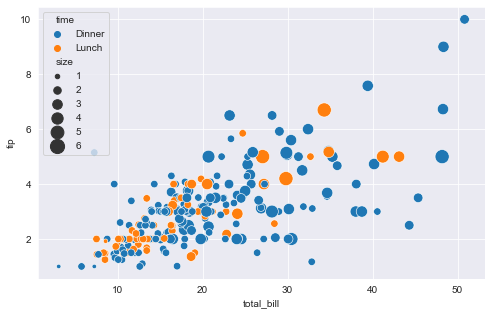

In [99]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.scatterplot(data=tips_df, x="total_bill", y="tip", hue="time", size="size", sizes=(20, 200), legend="full")
plt.show()

In [100]:
tips_df[['total_bill', 'tip']].corr() # Correlation matrix

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In this case, with a **correlation coefficient equal to 0.67**, we would say that we have a **moderate strong correlation** between variables, meaning there is linear correlation between what you pay and what you tip. Also, people pay more having dinners than lunches as it seems to be a higher density of blue points at 2 o'clock (where x and y are higher). Let's see the numbers:


In [101]:
tips_df.groupby('time')[['total_bill', 'tip']].mean()

,total_bill,tip
time,,
Dinner,20.797159,3.102670
Lunch,17.168676,2.728088


#### 1 Numeric variable: tip, tip_p

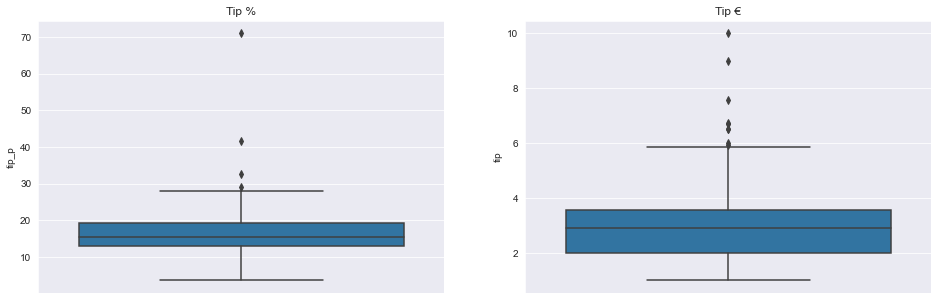

In [102]:
fig, (ax1, ax2) = plt.subplots(figsize = (16, 5), nrows = 1, ncols = 2)
sns.boxplot(ax = ax1, y = tips_df['tip_p'])
sns.boxplot(ax = ax2, y = 'tip', data = tips_df)
ax1.set_title('Tip %')
ax2.set_title('Tip €')
plt.show()


#### 2 Variables, 1 Numeric and 1 Categorical: tip_p and day 

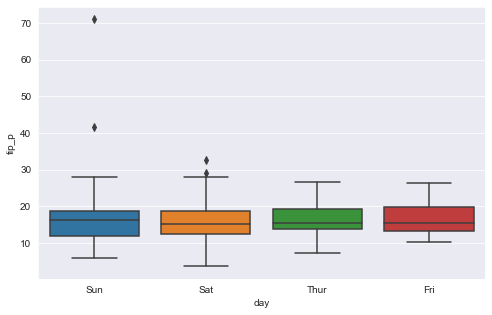

In [103]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x = 'day', y = 'tip_p', data = tips_df)
plt.show()

We can see that the median does not vary much on different days. In addition, there is an outlier very far from the median. A couple of cells above we saw that **tip_p** mean and deviation is 16.08 +/- 6.11, so 71% or 41% of tip_p is not representative I think. I'm going to get rid of thoes.

In [104]:
tips_df[tips_df.tip_p > 40]

,total_bill,tip,sex,smoker,day,time,size,tip_p
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667


This rows have a big percentage of **tip_p** for small **total_bill**. Mean **total_bill** is 19.79. As we said i previous cell, this points are not representative, they make "noise".

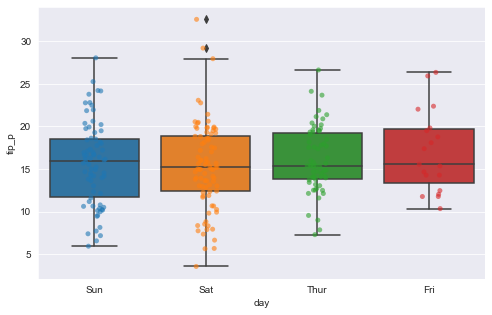

In [105]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x = 'day', y = 'tip_p', data = tips_df[tips_df.tip_p < 40])
sns.stripplot(x = 'day', y = 'tip_p', data = tips_df[tips_df.tip_p < 40], alpha= 0.6);
plt.show()

We have a big density near the median. On Saturdays and Sundays seems to be a bigger dispersion as the interquartile range (IQR) is wider.

#### 3 Variables, 1 Numeric and 2 Categorical: tip_p, day and time 

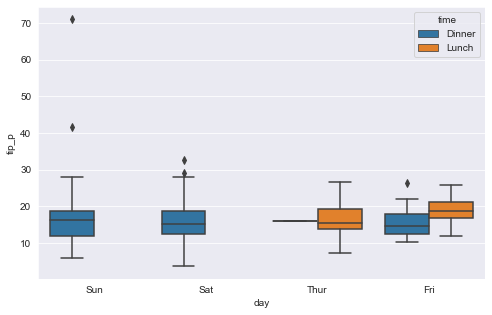

In [106]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x = 'day', y = 'tip_p', hue = 'time', data = tips_df)
plt.show()

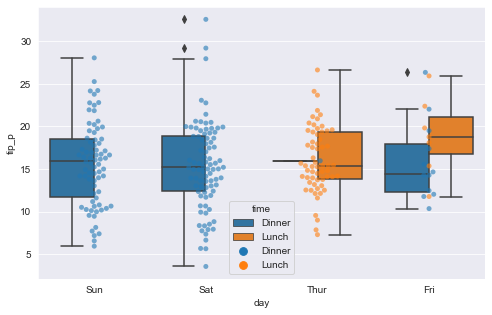

In [107]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(x = 'day', y = 'tip_p', hue = 'time', data = tips_df[tips_df.tip_p < 40])
sns.swarmplot(x = 'day', y = 'tip_p', hue = 'time', data = tips_df[tips_df.tip_p < 40], alpha= 0.6);
plt.show()

Friday lunches have the higher **tip_p** median but few occurrences, 7.

In [108]:
tips_df.groupby('day')['time'].value_counts()

day   time  
Fri   Dinner    12
      Lunch      7
Sat   Dinner    87
Sun   Dinner    76
Thur  Lunch     61
      Dinner     1
Name: time, dtype: int64

#### Facet Grids y Categorical DataFrame

Use catplot() to combine a boxplot() and a FacetGrid.

#### 4 Variables, 3 Categorical ('day', 'time', 'smoker') and 1 Numeric (tip_p)

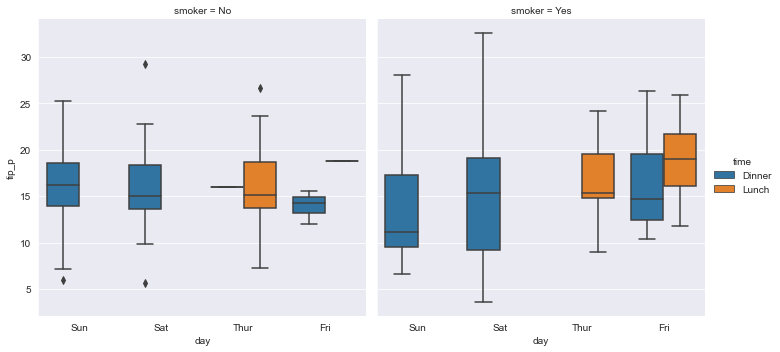

In [109]:
sns.catplot(x = 'day', y = 'tip_p', hue = 'time', col = 'smoker', data = tips_df[tips_df['tip_p'] < 40], kind = 'box');

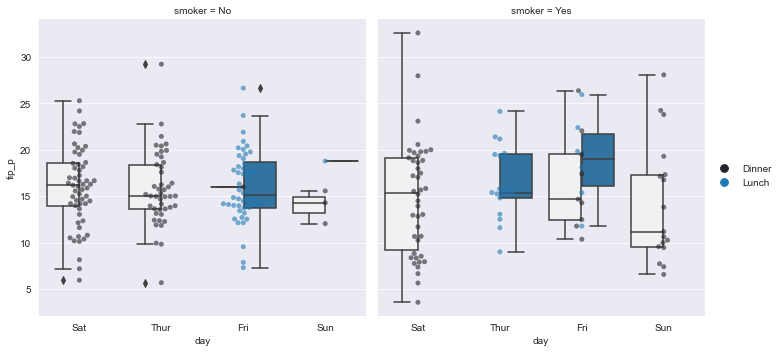

In [110]:
g = sns.FacetGrid(tips_df[tips_df.tip_p < 40], col = 'smoker', height = 5)
g.map_dataframe(sns.boxplot, x = 'day', y = 'tip_p', hue = 'time')
g.map_dataframe(sns.swarmplot, x = 'day', y = 'tip_p', hue = 'time', alpha= 0.6)
g.add_legend()
plt.show()

If you go out for dinner on Sunday you have big chances to sit next to a smoker.

## <SPAN style=color:#1F618D>Level 2 & 3</SPAN>

### <SPAN style=color:#1F618D>Practice 2 & 3</SPAN>

<SPAN style=color:#1F618D>Repeat practice 1 with **movies.dat** dataset in the GitHub PRE-PROCESSING-DATA repository. Do some original interpretation charts of the dataset</SPAN>

First we load movie.dat dataset with Pandas pd.read_csv() function and perform a preliminary sudy of the data, shape, variables, etc.

In [111]:
cols = ['id', 'film', 'cat'] # no cols names on original dataset
movies_df = pd.read_csv('movies.dat', sep ='::', engine = 'python', header = None, names = cols, encoding='latin-1')
movies_df

,id,film,cat
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [112]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3883 non-null   int64 
 1   film    3883 non-null   object
 2   cat     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


We have a 2 dimensions dataframe with three variables, id, name of the movie with year included and gender. 

Before going any further I'm going to separate the **film** column into **name** and **year**. Also, with **cat** column it is better to separate between different categories.

<SPAN style=color:#8D1F3B>Also, there is a **"Children's"** and a "**"Children's"** gender category, the last one with only 1 data. I'm going to fix that in the dataset by adding **'** a hyphen to Childrens.</SPAN>

In [113]:
# category (cat) column split
cats_df = movies_df['cat'].str.split('|', expand = True) # dataframe with cats exploited one in each column, dim expands
cats_df.head()

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None


In [114]:
# naming new columns
for i in range(len(cats_df.columns)): 
    movies_df['cat'+ str(i)] = cats_df[i]

# get rid of original cat column
# movies_df.drop(['cat'], axis = 1, inplace = True)

movies_df.head(3)

,id,film,cat,cat0,cat1,cat2,cat3,cat4,cat5
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's,Comedy,None,None,None
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None,None


In [115]:
# independent column with year
movies_df['year'] = movies_df['film'].str.slice(-5,-1)
movies_df['film2'] = movies_df['film'].str.slice(0,-6)
movies_df.drop(['film'], axis = 1, inplace = True)

In [116]:
movies_df.describe(include = 'all')

,id,cat,cat0,cat1,cat2,cat3,cat4,cat5,year,film2
count,3883.000000,3883,3883,1858,536,115,15,1,3883,3883
unique,NaN,301,18,17,15,13,6,1,81,3841
top,NaN,Drama,Drama,Drama,Thriller,Thriller,Thriller,War,1996,Hamlet
freq,NaN,843,1176,381,120,40,3,1,345,5
mean,1986.049446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1146.778349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,982.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2980.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
movies_df.ndim

2

#### Let's study the ***cat*** variable

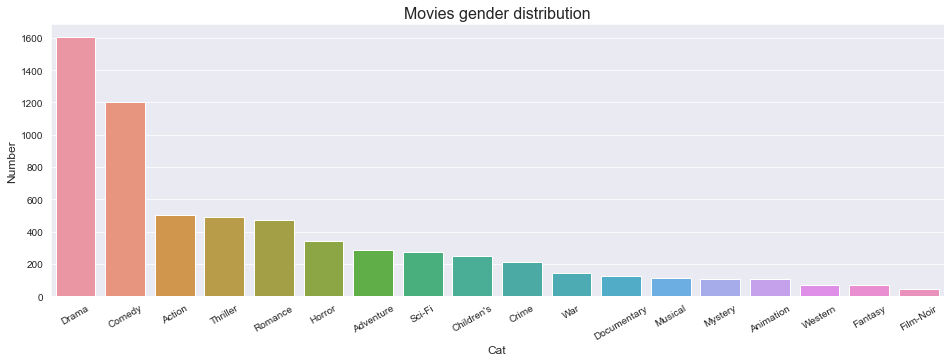

In [118]:
# prepare data
fig, ax = plt.subplots(figsize = (16, 5))
cats_count = cats_df.apply(pd.Series.value_counts).sum(axis = 1).sort_values(ascending = False)
sns.barplot(x = cats_count.index, y = cats_count.values)
ax.set_xticklabels(cats_count.index, rotation = 30)
ax.set_xlabel('Cat', fontsize = 12)
ax.set_ylabel('Number', fontsize = 12)
ax.set_title('Movies gender distribution', fontsize = 16)
plt.show()

With this chart it becomes clear that some Drama and Comedy, also known as Dramedy, is present in many movies. There are 3883 films in the dataframe so 41% contain some Drama and 31% some Comedy.

In [119]:
cats_count

Drama          1603.0
Comedy         1200.0
Action          503.0
Thriller        492.0
Romance         471.0
Horror          343.0
Adventure       283.0
Sci-Fi          276.0
Children's      251.0
Crime           211.0
War             143.0
Documentary     127.0
Musical         114.0
Mystery         106.0
Animation       105.0
Western          68.0
Fantasy          68.0
Film-Noir        44.0
dtype: float64

#### Now let's study ***year*** variable

In [120]:
movies_year = movies_df['year'].value_counts().sort_index()
movies_year

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

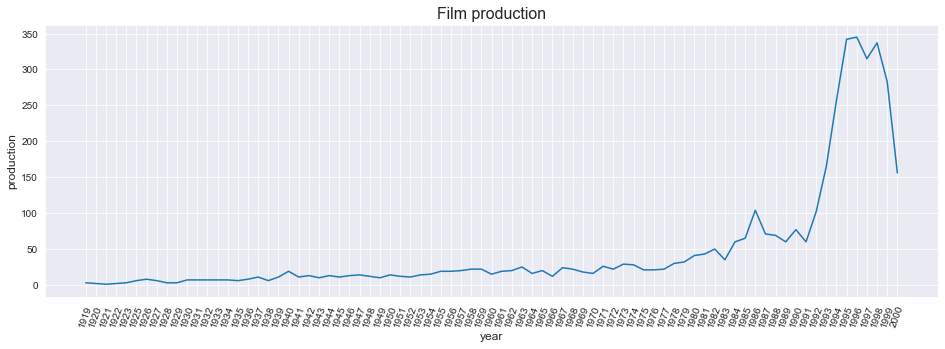

In [121]:
fig, ax = plt.subplots(figsize = (16, 5))
x = movies_year.index
sns.lineplot(x = x, y = movies_year.values)

ax.set_xticks(x)
ax.set_xticklabels(x, rotation=70)
ax.set_xlabel('year', fontsize = 12)
ax.set_ylabel('production', fontsize = 12)
ax.set_title('Film production', fontsize = 16)

plt.show()

#### Let's see both variables, ***cat and year***

First of all, let's create one boolean column for each category per film in order to study more profoundly these variables and how they relate.

In [122]:
for i in cats_count.index: 
    movies_df[i] = [True if  i in s else False for s in movies_df['cat']]

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           3883 non-null   int64 
 1   cat          3883 non-null   object
 2   cat0         3883 non-null   object
 3   cat1         1858 non-null   object
 4   cat2         536 non-null    object
 5   cat3         115 non-null    object
 6   cat4         15 non-null     object
 7   cat5         1 non-null      object
 8   year         3883 non-null   object
 9   film2        3883 non-null   object
 10  Drama        3883 non-null   bool  
 11  Comedy       3883 non-null   bool  
 12  Action       3883 non-null   bool  
 13  Thriller     3883 non-null   bool  
 14  Romance      3883 non-null   bool  
 15  Horror       3883 non-null   bool  
 16  Adventure    3883 non-null   bool  
 17  Sci-Fi       3883 non-null   bool  
 18  Children's   3883 non-null   bool  
 19  Crime        3883 non-null 

In [123]:
cats_list = cats_count.index

In [124]:
cat_year_df= movies_df[['year','Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Horror',
       'Adventure', 'Sci-Fi', '''Children's''', 'Crime', 'War', 'Documentary',
       'Musical', 'Mystery', 'Animation', 'Western', 'Fantasy', 'Film-Noir']]

datxs = cat_year_df.groupby('year').sum()
datxs['Year'] = datxs.index.astype(int)
datxs


,Drama,Comedy,Action,Thriller,Romance,Horror,Adventure,Sci-Fi,Children's,Crime,War,Documentary,Musical,Mystery,Animation,Western,Fantasy,Film-Noir,Year
year,,,,,,,,,,,,,,,,,,,
1919,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1919
1920,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1920
1921,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1921
1922,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1922
1923,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,150,115,37,45,48,12,22,14,20,23,8,19,7,6,7,1,5,2,1996
1997,139,98,43,55,52,10,22,18,22,26,10,11,5,15,6,0,6,2,1997
1998,166,112,44,51,58,15,16,17,18,25,5,18,3,10,8,1,2,3,1998


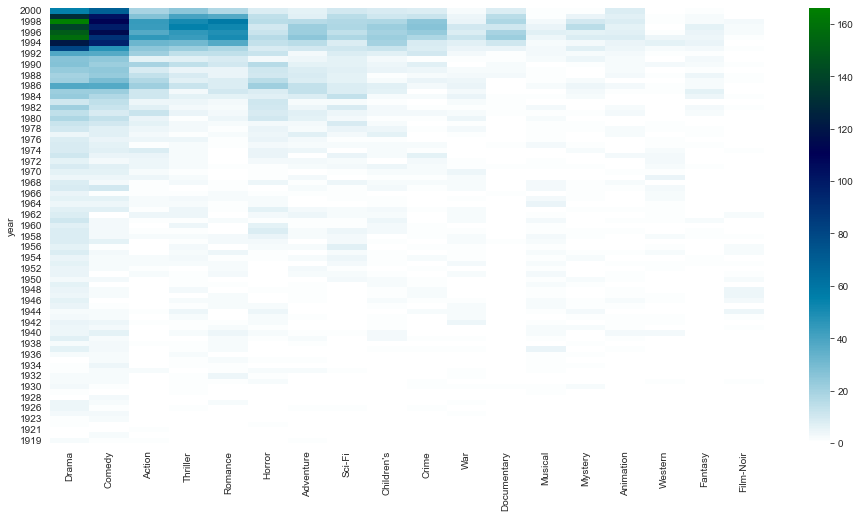

In [125]:
datxss = cat_year_df.groupby('year').sum()
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(datxss, cmap = 'ocean_r')
ax.invert_yaxis()
plt.show()

By intensity and scale we can see the evolution of film production by gender. For example, we could say that **Documentary** films are a fairly new genre compared to others as chart is almost white until 1988. On the other hand, **Film-Noir** moives seem to be disappearing. Let's zoom.

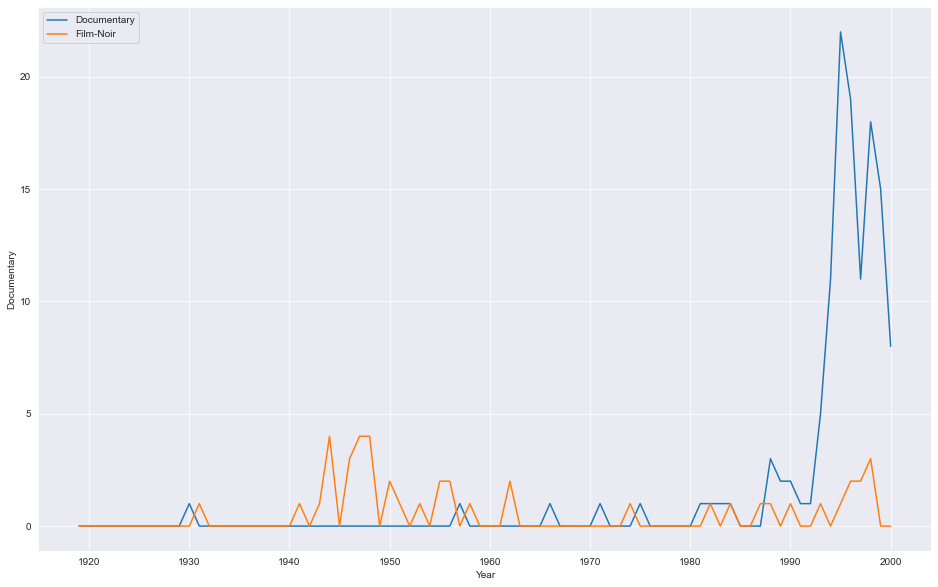

In [126]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.lineplot(x = 'Year', y = 'Documentary', data = datxs, label = 'Documentary')
sns.lineplot(x = 'Year', y = 'Film-Noir', data = datxs, label = 'Film-Noir')
# sns.lineplot(x = 'Year', y = 'Drama', data = datxs, label = 'Drama')
# # ax.set_xlabel('year', fontsize = 12)
# # ax.set_ylabel('Documentary films', fontsize = 12)
# # ax.set_title('Documentary films evolution', fontsize = 16)
# # ax.set_xticks(datxs['Year'])
# # ax.set_xticklabels(datxs['Year'], rotation=70)
ax.legend()
plt.show() 


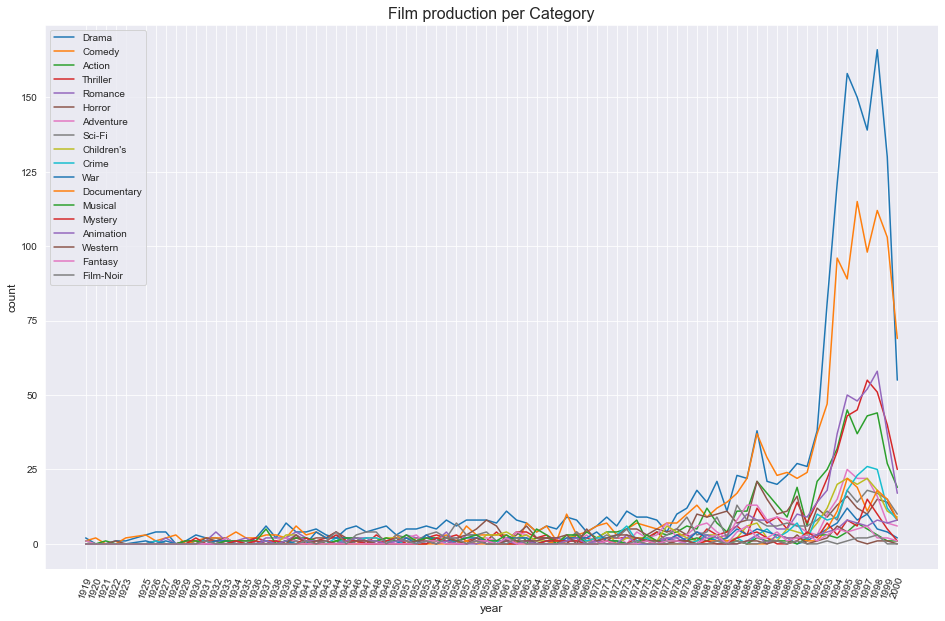

In [127]:
fig, ax = plt.subplots(figsize = (16, 10))
for i in cats_list:
    sns.lineplot(data = datxs, x = 'Year' , y = i, label = i)

ax.set_xlabel('year', fontsize = 12)
ax.set_ylabel('count', fontsize = 12)
ax.set_title('Film production per Category', fontsize = 16)
ax.set_xticks(datxs['Year'])
ax.set_xticklabels(datxs['Year'], rotation=70)
ax.legend()
plt.show()   

This graph also shows movies production evolution over the years by gender in more traditional way.